<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_machine_learning/blob/main/15_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1, 5)
1 ====> [5.1 2.2]
2 ====> [3.8 3.7]
3 ====> [3.4 1.9]
4 ====> [2.9 2.5]
5 ====> [5.7 3.5]


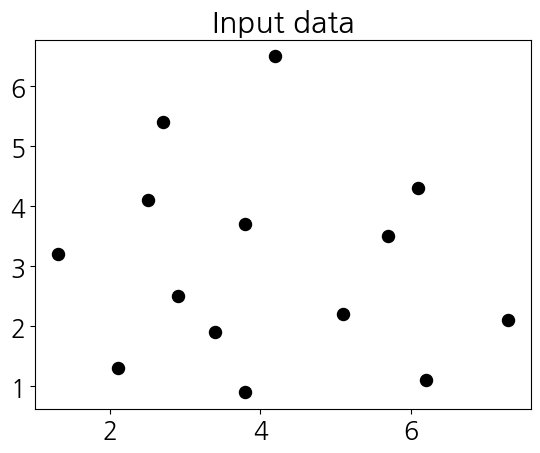

In [ ]:
#distance를 이용한 근접한 k개의 데이터를 검색
#검색을 위한 데이터 구조 : BallTree(원형), KDTree(작은데이터를 binary하게 분리 : 큰데이터에 쓰면 depth가 깊어져서 비효율적)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])
k=5
test_datapoint=[4.3,2.7]
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0],X[:,1],marker='o',s=75,color='black')
#분류 목적이 아니더라도 근접한 데이터를 탐색할 때도 사용
knn_model=NearestNeighbors(n_neighbors=k,algorithm='ball_tree').fit(X)
distances,indices=knn_model.kneighbors([test_datapoint])
#minkoswski (p), euclidian
#(pi-pi)**n
#(pi-pi)**2인 특별한 경우 : 유클리디안 거리값
print(indices.shape)
for rank, index in enumerate(indices[0][:k],start=1):
  print(str(rank),"====>",X[index])

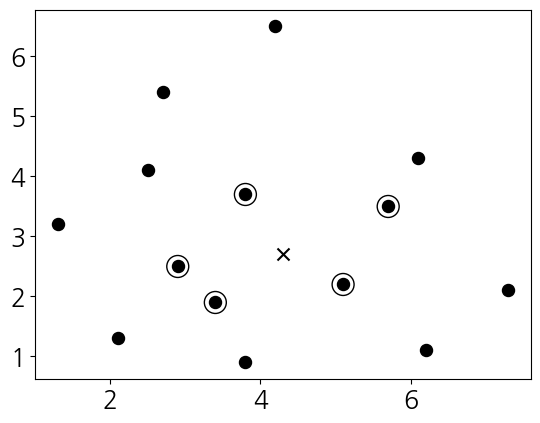

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',s=75,color='k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker='o',s=250,color='k',facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],marker='x',s=75,color='k')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
input_file = '/content/drive/MyDrive/mirae/csv/data.txt'
data=np.loadtxt(input_file,delimiter=',')
X,y=data[:,:-1],data[:,-1].astype(np.int)
print(X.shape)
X[:5]

(300, 2)


<ipython-input-82-85e494d55f54>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X,y=data[:,:-1],data[:,-1].astype(np.int)


array([[1.77, 2.67],
       [3.72, 4.03],
       [6.66, 2.89],
       [8.51, 1.98],
       [0.53, 2.98]])

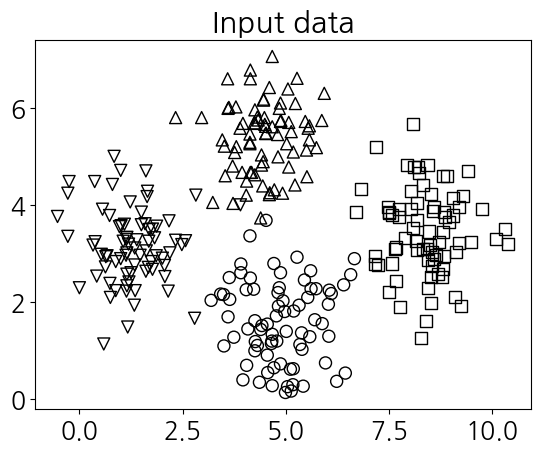

In [ ]:
plt.figure()
plt.title('Input data')
marker_shapes='v^os' #suqare
mapper=[marker_shapes[i] for i in y]
for i in range(X.shape[0]):
  plt.scatter(X[i,0],X[i,1],marker=mapper[i],s=75,edgecolors='black',facecolors='none')

In [ ]:
num_neighbors=12
#knn 분류기
#uniform, distance 가중치
#weights 가중
classifier=neighbors.KNeighborsClassifier(num_neighbors,weights='distance')
classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [ ]:
classifier.get_params() #디폴트 파라미터 확인

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 2,
 'weights': 'distance'}

In [ ]:
#2차원 300x2 2개의 열에대한 최대 최소값
x_min,x_max=X[:,0].min()-1, X[:,0].max()+1
y_min,y_max=X[:,1].min()-1, X[:,1].max()+1
y_min,y_max

(-0.87, 8.059999999999999)

In [ ]:
step_size=0.01
x_values, y_values = np.meshgrid(np.arange(x_min,x_max,step_size), np.arange(y_min,y_max,step_size))
len(x_values), len(y_values) #(893,893)
len(x_values[0]), len(y_values[0]) #(1292,1292)
893*1292 #1153756개의 접점이 생김

1153756

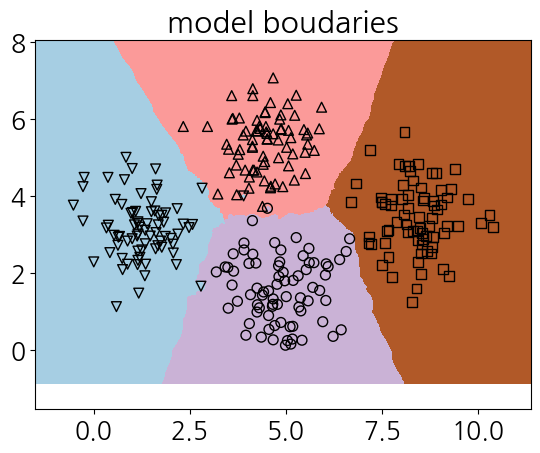

In [ ]:
output=classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
output=output.reshape(x_values.shape)
plt.figure()
#heat map : rectangular gird
#Create a pseudocolor plot with a non-regular rectangular grid,
#point마다 컬러값을 결정
plt.pcolormesh(x_values,y_values,output,cmap=cm.Paired) #110만개의 데이터컬러값으로 출력
for i in range(X.shape[0]):
  #컬러값 위에 실제 데이터 찍음
  plt.scatter(X[i,0], X[i,1],marker=mapper[i], s=50,edgecolors='black',facecolors='none')
  plt.xlim(x_values.min(),x_values.max())
  plt.ylim(x_values.min(),y_values.max())
  plt.title('model boudaries')
  test_datapoint=[5.1,3.6]

In [ ]:
classifier.predict(np.c_[test_datapoint,test_datapoint])

array([1, 1])

In [ ]:
#근접한 정점의 인덱스 번호
_,indices=classifier.kneighbors([test_datapoint,test_datapoint]) #_ : 최근접 이웃의 거리, indices : 최근접 이웃의 인덱스
indices.shape

(2, 12)

In [ ]:
indices[1]

array([270, 289, 226, 257, 277,  21, 221,  77, 170, 166,  10, 273])

In [ ]:
A=classifier.kneighbors_graph()

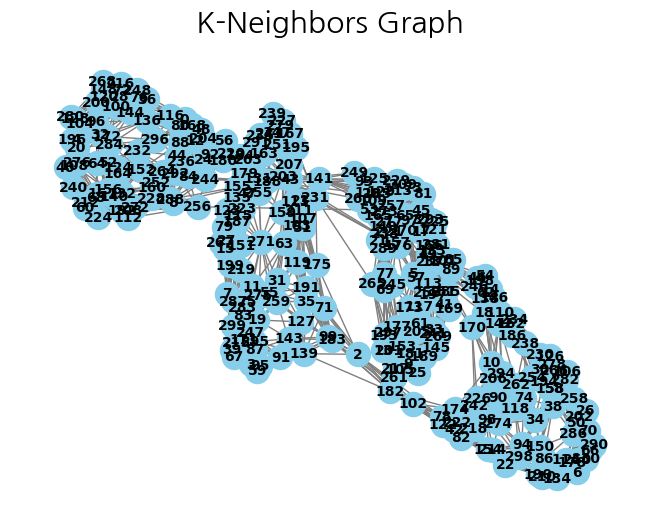

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph(A)
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size=300,font_size=10,font_color='black',font_weight='bold',node_color='skyblue',edge_color='gray')
plt.title('K-Neighbors Graph')
plt.show()

In [ ]:
#Y값에 따른 확률값으로 표현
classifier.predict_proba(np.c_[test_datapoint,test_datapoint])
#0이될 확률    #1이될 확률  #2이될 확률 #3이될 확률

array([[0.        , 1.        , 0.        , 0.        ],
       [0.18320427, 0.51931801, 0.29747772, 0.        ]])

In [ ]:
#문제
#test_datapoint로부터 12개의 포인터 중
#array([270, 289, 226, 257, 277,  21, 221,  77, 170, 166,  10, 273])
#289번과의 거리값을 실제 계산해보시오
X[289,:] #289번

array([4.92, 4.24])

In [ ]:
#_에 거리값이 저장되어있음
_,indices=classifier.kneighbors([test_datapoint,test_datapoint])
indices.shape
np.math.sqrt(sum((test_datapoint-X[289,:])**2))

0.6648308055437865

In [ ]:
indices[0]

array([270, 289, 226, 257, 277,  21, 221,  77, 170, 166,  10, 273])

In [ ]:
_[1]

array([0.58549125, 0.66483081, 0.70092796, 0.7218033 , 0.78873316,
       0.80529498, 0.81400246, 0.81884064, 0.89899944, 0.99924972,
       1.02610916, 1.02941731])

In [ ]:
classifier.score(X,y)

1.0

(87, 65)


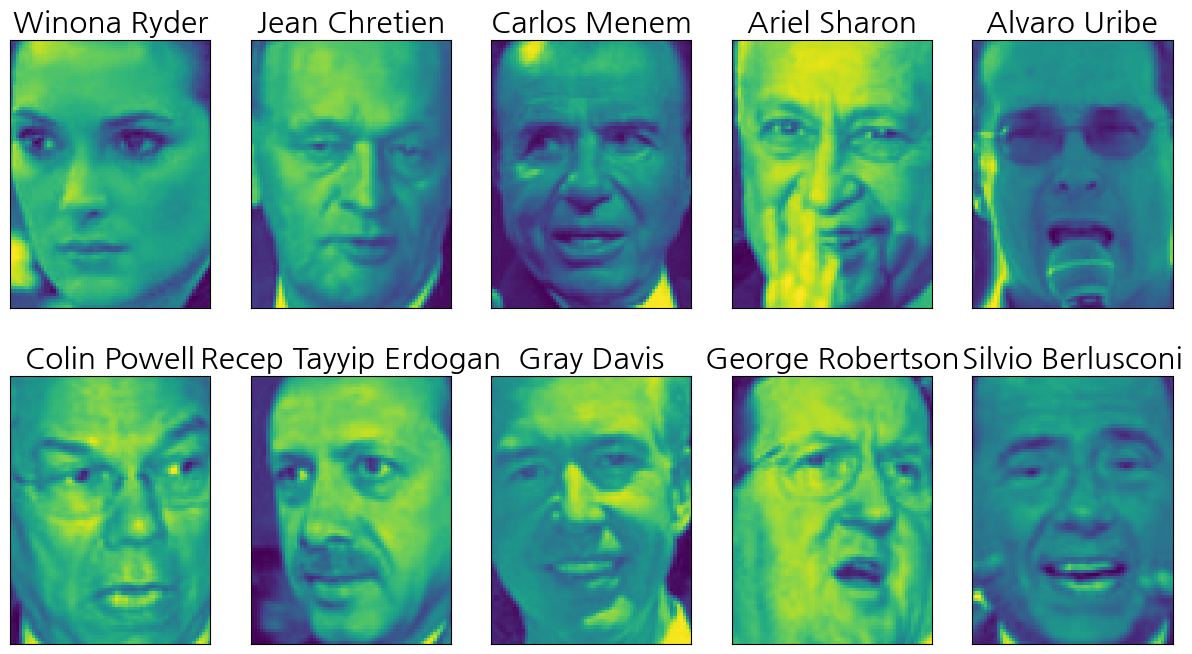

In [ ]:
#이미지 분류를 위한 데이터
from sklearn.datasets import fetch_lfw_people #lfw : labeled face wild
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7) #이미지가 20장, 메모리 절약
image_shape=people.images[0].shape
print(image_shape) #이미지 사이즈 87x65
fig,axes=plt.subplots(2,5,figsize=(15,8), #2x5
                      subplot_kw={'xticks':(),'yticks':()}) #격자랑 숫자 없애는거
for target,image, ax in zip(people.target,people.images,axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [ ]:
people.target[0:10],people.target_names[people.target[0:10]]
print("people.images.shape : {}".format(people.images.shape)) #(3023, 87, 65) #3023장의 데이터
print("클래스 개수 : {}".format(len(people.target_names))) #사람은 62명

people.images.shape : (3023, 87, 65)
클래스 개수 : 62


In [ ]:
#범주형 변수에 대해서 카운트
counts=np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
  print("{0:25} {1:3}".format(name,count),end='  ')
  if (i+1) % 3 ==0:
    print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [ ]:
mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]]=1 #50장으로 제한
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255  #부동소수점 이미지로 이미지 정규화

<ipython-input-151-090160039ce8>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros(people.target.shape, dtype=np.bool)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.22


In [ ]:
3350380/4316.4

776.197757390418

In [ ]:
3391946/4348.9

779.9549311320104

In [ ]:
#과적합하는 경향이 있음
knn.score(X_train,y_train)

1.0

In [ ]:
#이미지
87*65 #5655 학습에서는 fully-connected

5655

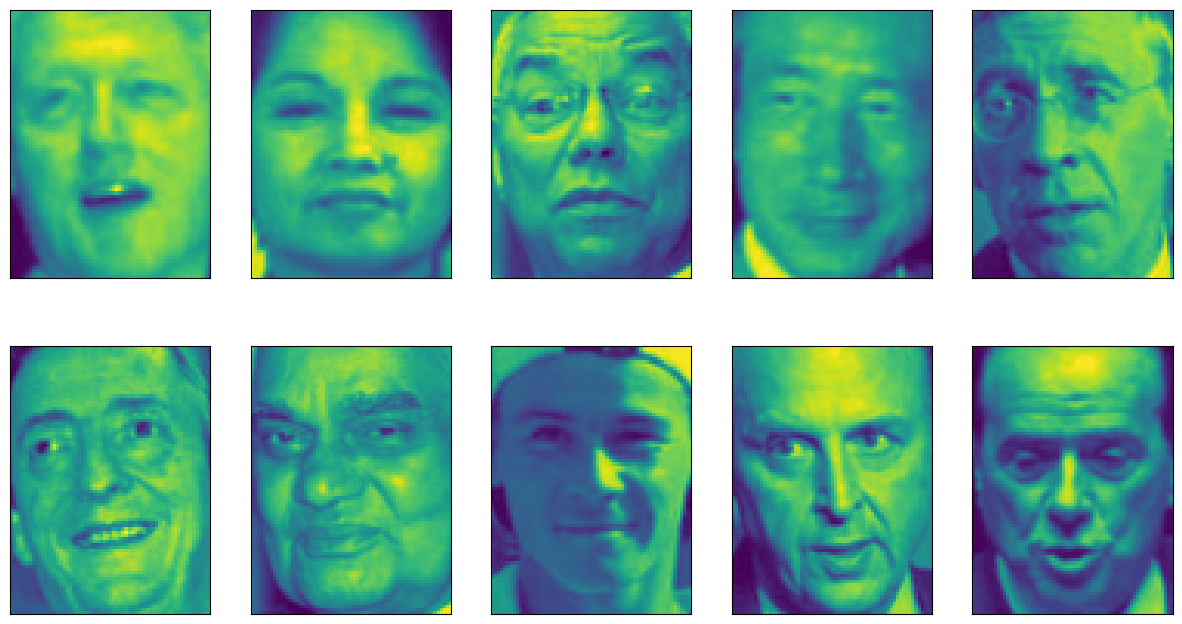

In [ ]:
#fully-connected
fig, axes=plt.subplots(2,5,figsize=(15,8),
                      subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(X_train[:10],axes.ravel()):
  ax.imshow(image.reshape(87,65))

In [ ]:
X_train.shape #(1547,5655)장수 이미지
#3차원 이미지 -> 2차원으로 변경
#열이 5655 -> 특성이 5655개 : 복잡

(1547, 5655)

In [ ]:
from sklearn.decomposition import PCA
#고유치(5655) + 고유벡트(5655*5655)
#주성분(100)
#고유치(100) + (5655*100) #모든 데이터는 다 참여해서 5655개가 참여하는데 5555개가 사라짐 100개의
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train) #whiten 이미지 정규화
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print("훈련차원 : {}".format(X_train_pca.shape))

훈련차원 : (1547, 100)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 :{:.2f}".format(knn.score(X_test_pca,y_test)))

테스트 세트 정확도 :0.30


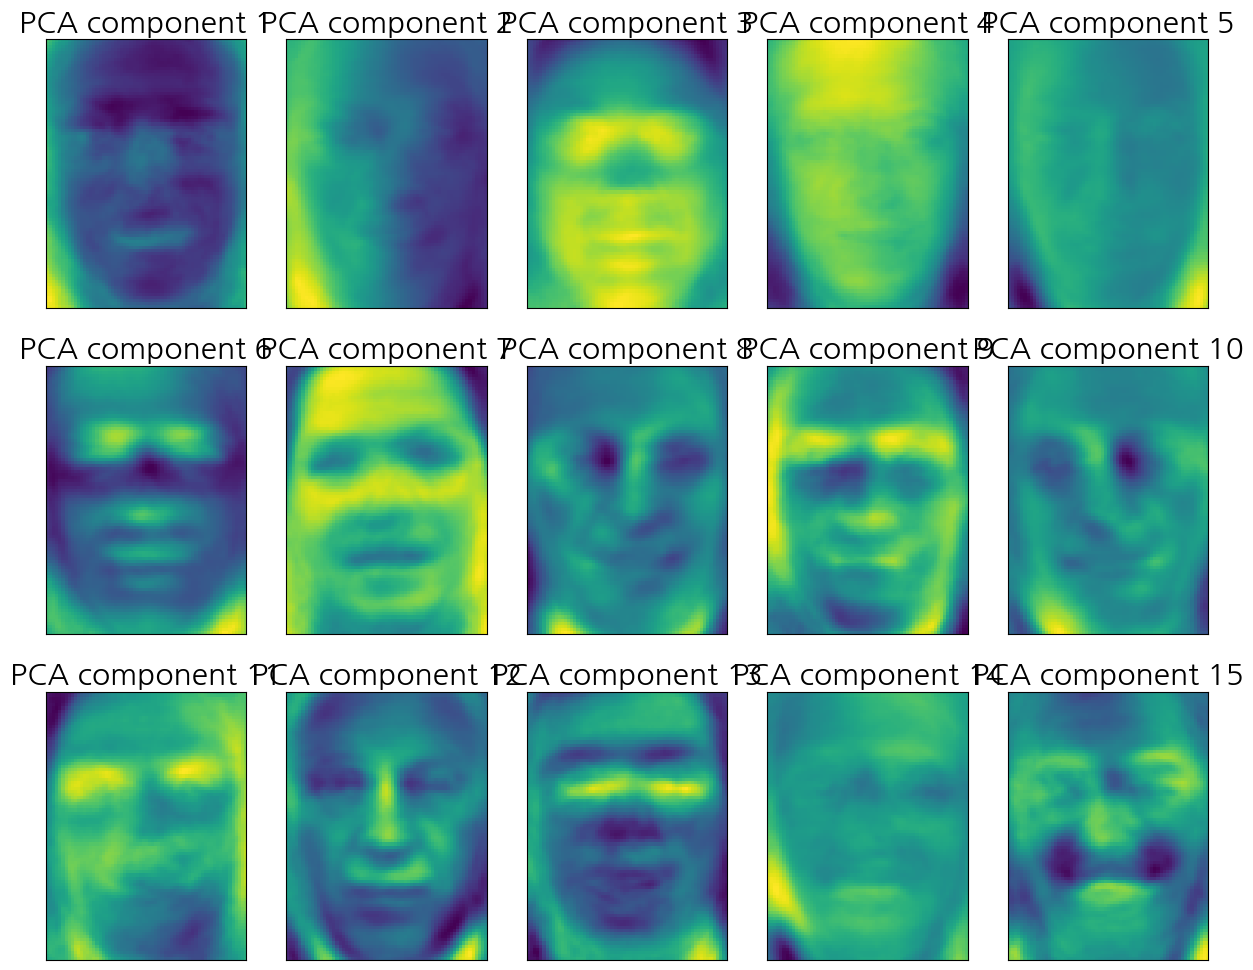

In [ ]:
#5655*100 특성을 추출한 결과
#특성벡터가 100 : 기준
fig, axes=plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})
for i,(component, ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape),cmap='viridis')
  ax.set_title("PCA component {}".format((i+1)))

In [ ]:
print(pca.components_.shape)
X_train.shape

(100, 5655)


(1547, 5655)

(516, 10)
(516, 100)


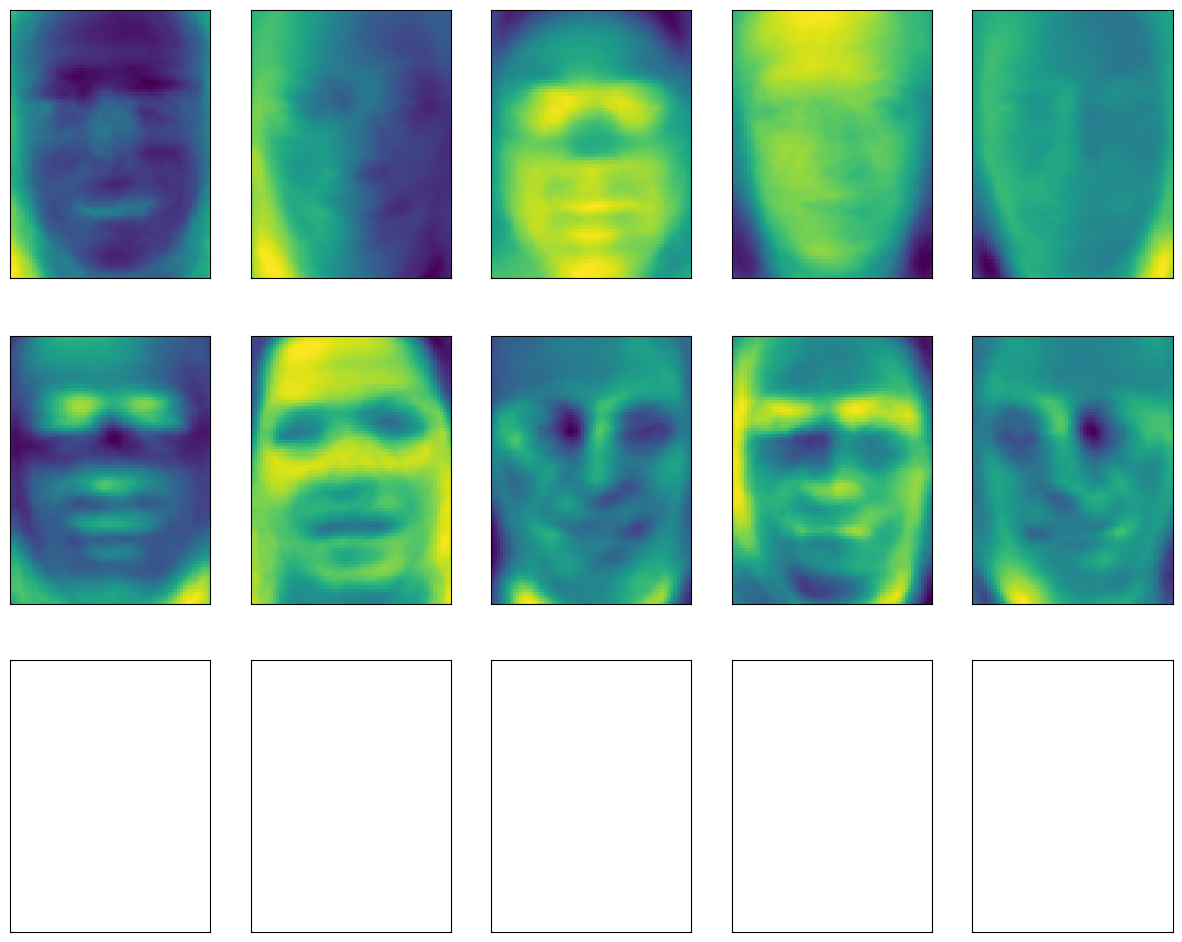

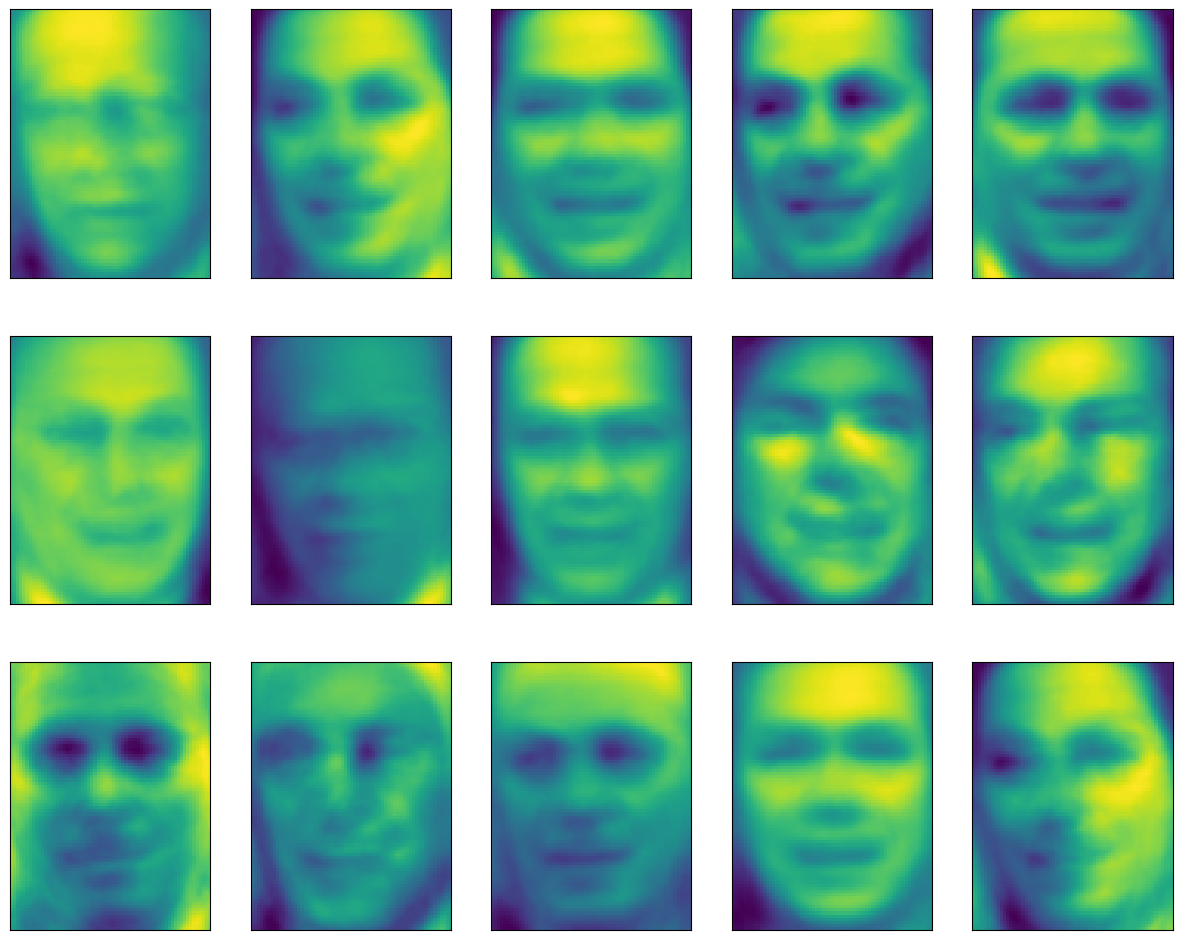

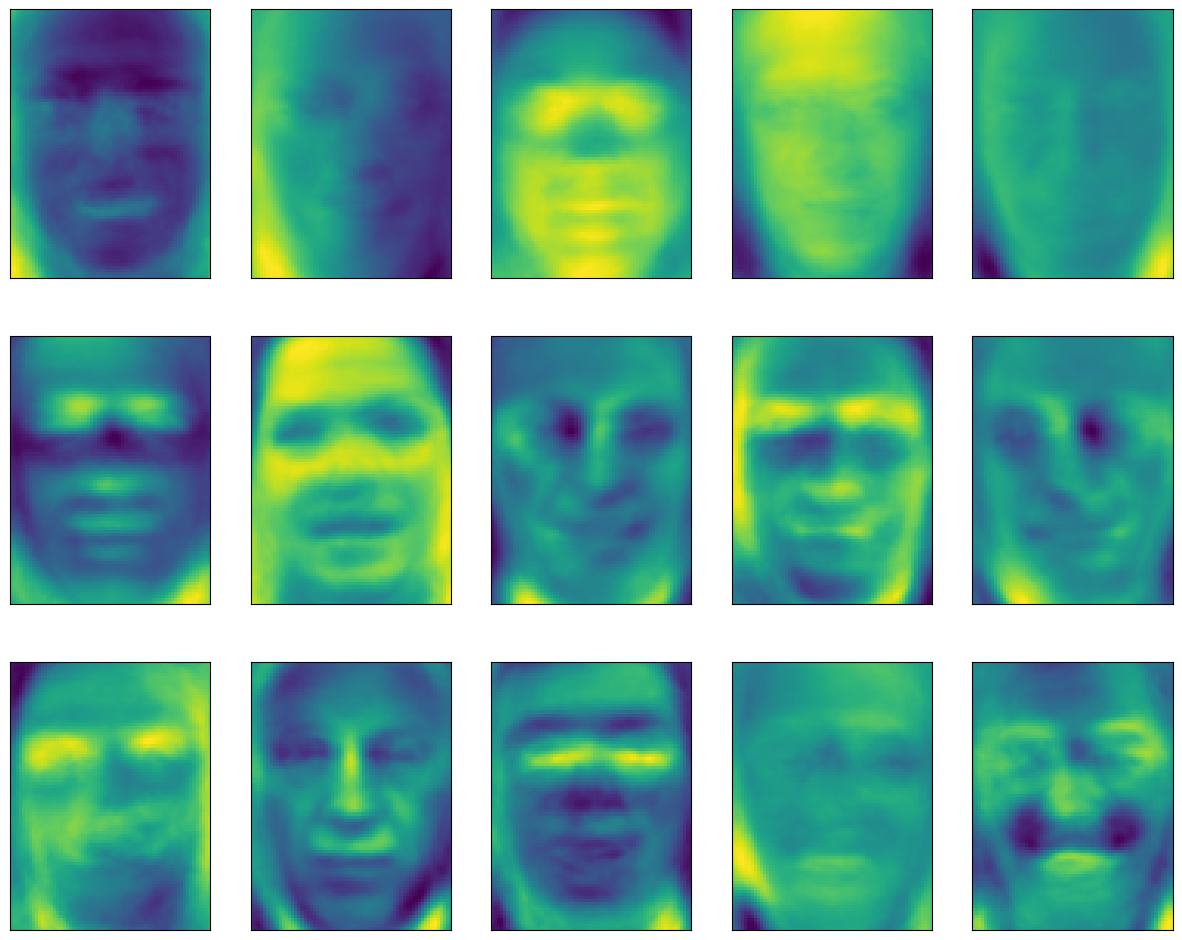

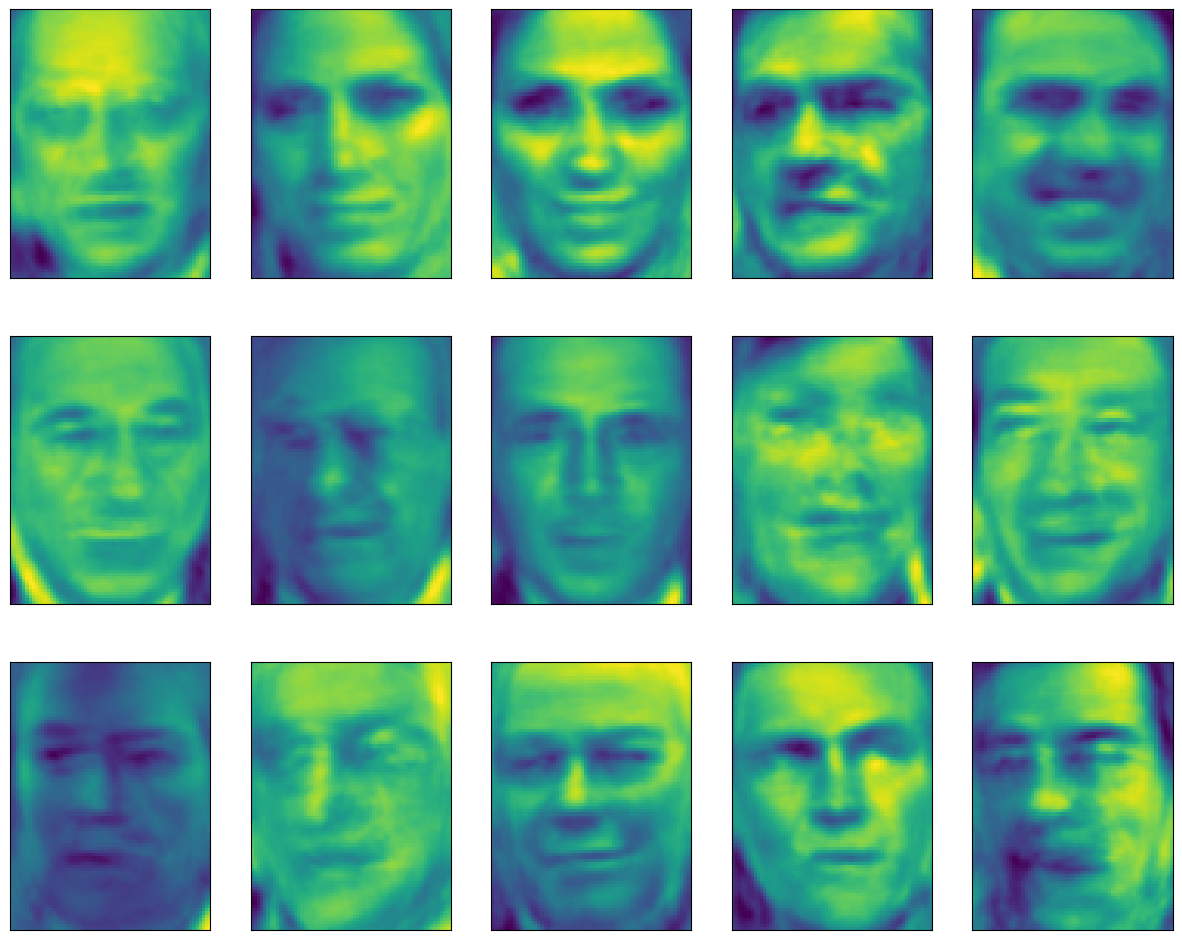

In [ ]:
reduced_images=[]
for n_components in [10,100]:
  pca=PCA(n_components=n_components)
  pca.fit(X_train)
  fig,axes=plt.subplots(3,5,figsize=(15,12),
                        subplot_kw={'xticks':(),'yticks':()})
  for (component, ax) in zip(pca.components_,axes.ravel()): #특성맵
    ax.imshow(component.reshape(image_shape),cmap='viridis')
  X_test_pca=pca.transform(X_test) #학습을 위해서 변환된 이미지(테스트 이미지 516장)
  print(X_test_pca.shape) #(516, 10) 5655->10
  #516x5655 -> 5655x10(행렬 : 고유벡터)=>516x10
  X_test_back=pca.inverse_transform(X_test_pca) #10->5655개가 되어야함
  #516x10   10x5655 => 516x5655 원래이미지로 사이즈 복원
  reduced_images.append(X_test_back)
  ig, axes=plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})
  for (component, ax) in zip(X_test_back[:15],axes.ravel()):
    ax.imshow(component.reshape(image_shape),cmap='viridis')

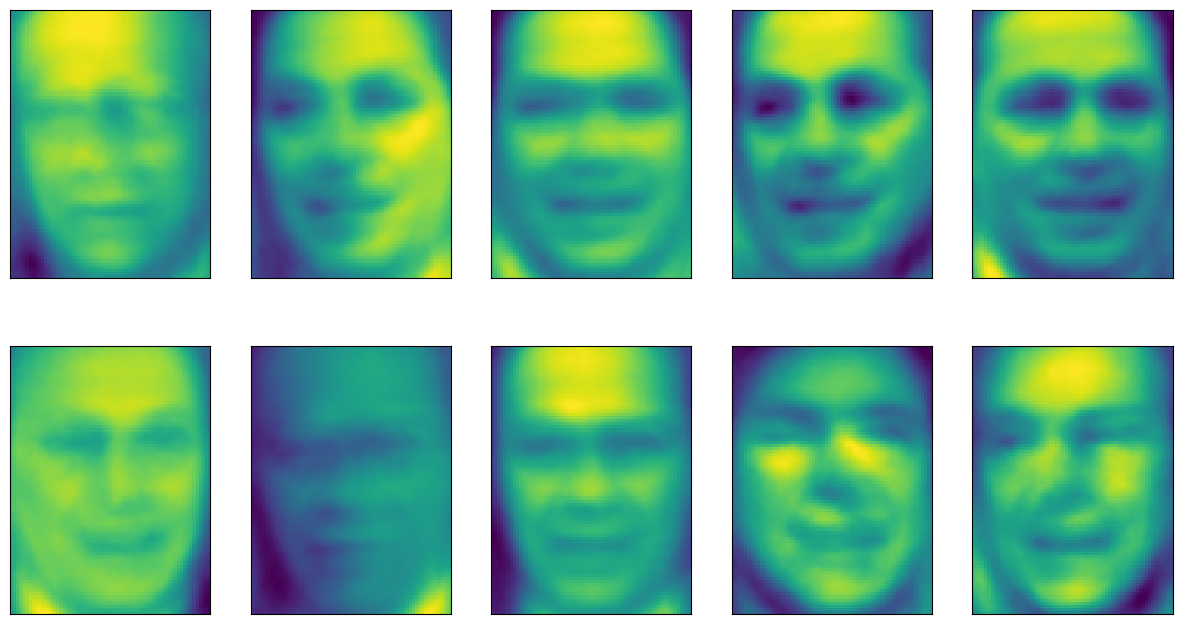

In [ ]:
fig, axes=plt.subplots(2,5,figsize=(15,8),
                       subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(reduced_images[0][:10],axes.ravel()):
  ax.imshow(image.reshape(87,65))

In [ ]:
#벡터 : 크기(피타고라스)와 방향
#방향값 : normalize
#벡터의 크기값
#모든 요소를 벡터의 크기값으로 나눠주면 방향값

In [ ]:
#거리값
#(20,30,90)
#(80,44,40)
#두 벡터의 거리값을 구하시오
#두 벡터의 내적을 구하시오
#두 벡터의 방향값을 구하시오
vec1=np.array([20,30,90])
vec2=np.array([80,44,40])

#두 벡터의 거리값을 구하시오
dis=np.sqrt(sum((vec1-vec2)**2))
print("거리값 : ",dis)

#두 벡터의 내적을 구하시오
dot=np.sum((20*80)+(30*44)+(90*40))
print("내적 : ",dot)

#두 벡터의 방향값을 구하시오
vec1_dist=np.sqrt(sum(vec1**2))
vec2_dist=np.sqrt(sum(vec2**2))

거리값 :  79.3473376995095
내적 :  6520


In [ ]:
vec1_direction=vec1/vec1_dist #방향값은 사이즈가 1

In [ ]:
np.sqrt(sum(vec1_direction**2))

1.0

In [ ]:
#내적
result=sum(vec1*vec2)
costheta=result/(vec1_dist * vec2_dist)

In [ ]:
theta=np.math.acos(costheta)
np.math.degrees(theta)

47.57310144715702

In [ ]:
a_64=np.array([61.22,71.60,-65.755], dtype=np.float64)
b_64=np.array([61.22,71.608,-65.72], dtype=np.float64)

In [ ]:
np.sqrt(np.sum(a_64-b_64)**2)

0.043000000000006366

In [ ]:
#매개변수로 vector를 받음
dist_64_np=np.array([np.linalg.norm(a_64-b_64)],dtype=np.float64)
dist_64_np

array([0.03590265])

In [ ]:
from sklearn import metrics
#유클리디안 거리값
dist_64_sklearn=metrics.pairwise_distances([a_64],[b_64],metric='euclidean')

In [ ]:
metrics.pairwise_distances([a_64],[b_64],metric='l1') #절대값

array([[0.043]])

In [ ]:
metrics.pairwise_distances([a_64],[b_64],metric='l2') #차의 제곱값

array([[0.03590265]])

In [ ]:
metrics.pairwise_distances([a_64],[b_64],metric='manhattan') #직선 거리

array([[0.043]])

Kmeans


In [ ]:
from sklearn import cluster, datasets
iris=datasets.load_iris()
X=iris.data[:,:2] #0,1만 독립변수로 설정 -> 시각화 때문에
y_iris=iris.target
#n_clusters : hyper parameter
km2=cluster.KMeans(n_clusters=2).fit(X)
km3=cluster.KMeans(n_clusters=3).fit(X)
km4=cluster.KMeans(n_clusters=4).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K=4, j=28.03')

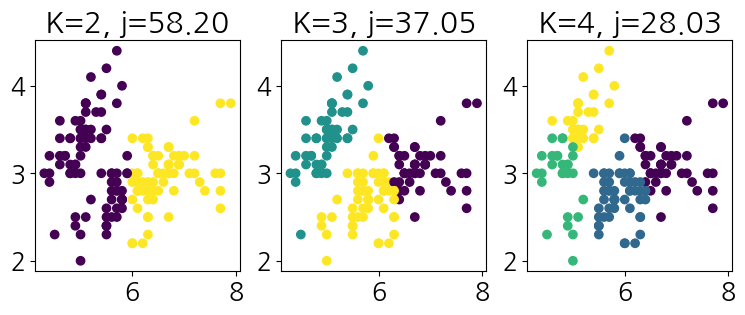

In [ ]:
#클러스터 개수가 늘어나면 WSS(within sum of square)는 점차 줄어드는 경향이 있음
#그룹 내 거리값의 합계(K개의 중심값과의 거리)
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=km2.labels_)
plt.title("K=2, j=%.2f"%km2.inertia_)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=km3.labels_)
plt.title("K=3, j=%.2f"%km3.inertia_)

plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=km4.labels_)
plt.title("K=4, j=%.2f"%km4.inertia_)


In [ ]:
km4.cluster_centers_ #그룹이 4개고 중심자표는 2개로 구성
#그룹의 특성은 중심값이 결정

array([[6.85348837, 3.1       ],
       [5.90980392, 2.73529412],
       [4.77777778, 2.94444444],
       [5.22068966, 3.66551724]])

In [ ]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

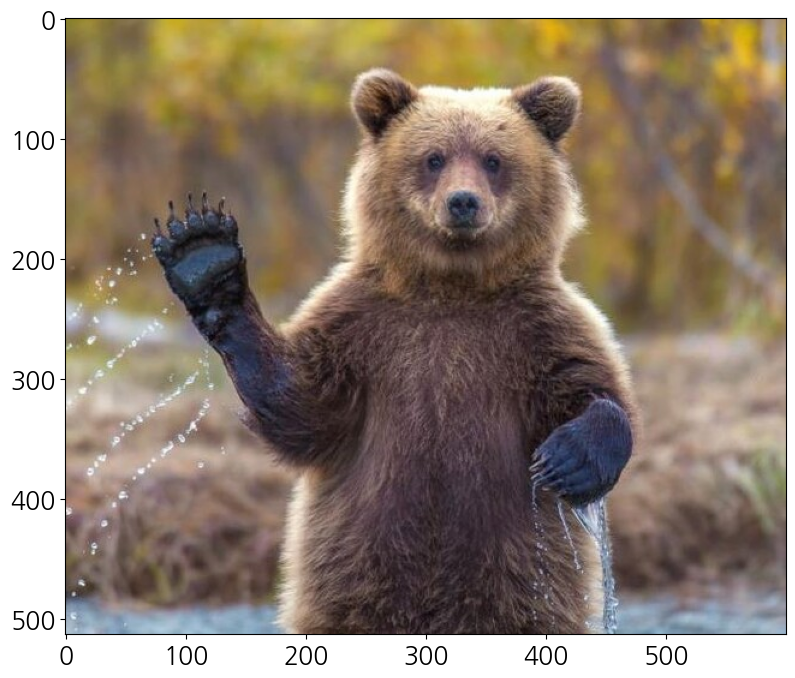

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster
image=plt.imread("/content/drive/MyDrive/mirae/csv/1885_4197_221.jpg")
plt.figure(figsize=(15,8))
plt.imshow(image)

In [ ]:
#이미지 바이트수 827400
res=image.shape[0]*image.shape[1]*image.shape[2]
res/1024

901.7578125

In [ ]:
#첫 픽셀
image[0][0]
#마지막 픽셀
image[512][599]

array([151, 176, 198], dtype=uint8)

In [ ]:
#이미지 데이터는 기본이 3차원
x,y,z=image.shape
x,y,z

(513, 600, 3)

In [ ]:
#dtype=uint8 정수형 이미지, 부동소수점 이미지도 지원(이미지를 정규화)
image=np.array(image,dtype=np.float64)/255
image_2d=image.reshape(x*y,z) #컬러정보만 처리
image_2d.shape #열 3개 == 속성 3개 => 이미지가 아니고 클러스터링 대상

(307800, 3)

In [ ]:
# plt.figure(figsize=(15,8))
# plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [ ]:
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers=kmeans_cluster.cluster_centers_
cluster_centers.shape #중심컬러 : 대표컬러

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16, 3)

In [ ]:
cluster_labels=kmeans_cluster.labels_
len(cluster_labels)

307800

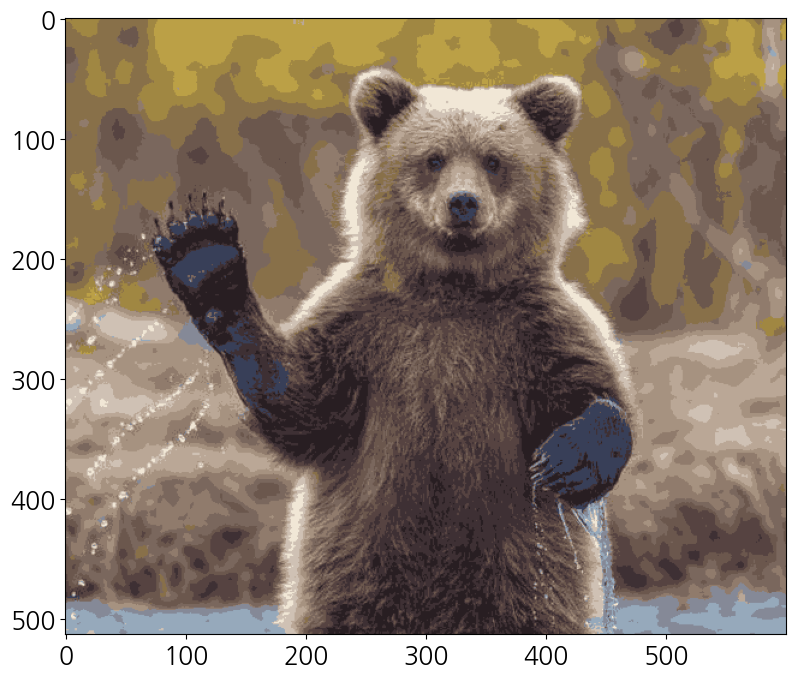

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

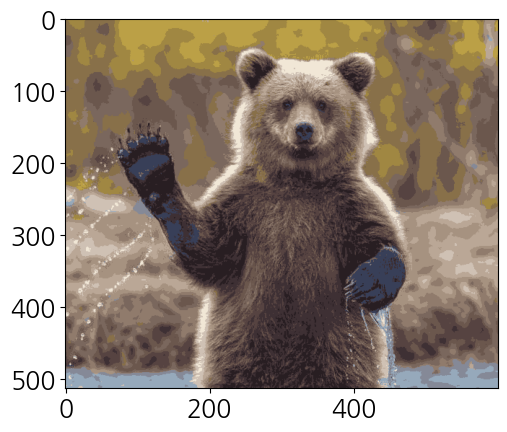

In [ ]:
#문제
#부동소수점 이미지를 unsigned int 형으로 변환해서 출력하시오
plt.imshow((cluster_centers*255).astype(np.uint8) [cluster_labels].reshape(x,y,z))

원형 이상치 제거

In [ ]:
from sklearn.datasets import make_blobs
X,label=make_blobs(100,centers=1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1)

In [ ]:
#한글화
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


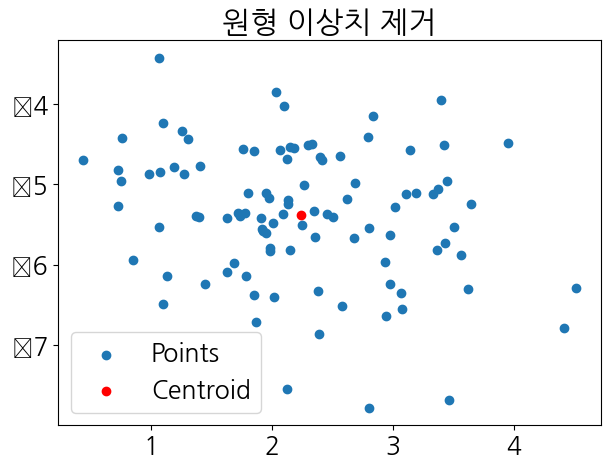

In [ ]:
#거리값으로 볼 때 동일 위치는 원으로 나타
f, ax=plt.subplots(figsize=(7,5))
ax.set_title('원형 이상치 제거')
ax.scatter(X[:,0],X[:,1],label='Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='Centroid',color='r')
ax.legend(loc='best')

In [ ]:
distances=kmeans.transform(X)
distances

array([[1.05084124],
       [0.58464684],
       [1.18700747],
       [1.39052151],
       [0.82215785],
       [0.21680349],
       [1.35676924],
       [0.69938733],
       [0.52273603],
       [1.83186408],
       [0.25638287],
       [0.90492409],
       [1.42889694],
       [0.11765807],
       [0.82062452],
       [1.20695592],
       [0.90386687],
       [2.61442692],
       [0.36347078],
       [1.54371312],
       [1.23891471],
       [1.51653972],
       [0.12642734],
       [1.46681792],
       [0.8719588 ],
       [1.4885584 ],
       [1.36299092],
       [0.78136543],
       [0.88673167],
       [0.51643724],
       [0.95172601],
       [1.03413559],
       [0.42792864],
       [0.73881449],
       [1.43799   ],
       [1.07060376],
       [0.37340852],
       [0.79430189],
       [0.87934297],
       [1.33228319],
       [0.52492377],
       [0.61174268],
       [0.98512624],
       [0.85398553],
       [2.16792771],
       [1.20725414],
       [2.5902462 ],
       [0.211

In [ ]:
#인덱스 사용할 때 1:4 ::-1 역순으로
#1::3   3까지 2씩 건너뛰면서
#데이터 인덱스를 사용
sorted_idx=np.argsort(distances.ravel())[::-1][:5] #제일 먼 5개
sorted_idx #인덱스 원래값이 있는 위치

array([17, 46, 85, 61, 92])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


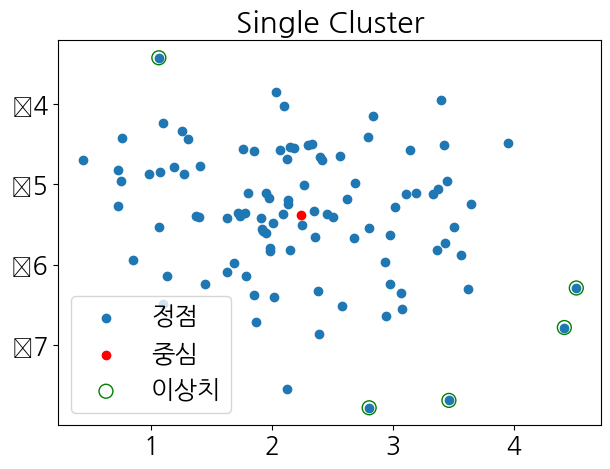

In [ ]:
#자동으로 이상치 제거 DBSCAN(eps, min_sample 이상인 것만 정상그룹, 나머지는 이상치로 봄)
#DBSCAN은 k 그룹수를 자동으로 결정, 중심값을 설정할 필요 없음
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:,0],X[:,1],label='정점')
ax.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           label='중심',color='r')
ax.scatter(X[sorted_idx][:,0],
           X[sorted_idx][:,1],
           label='이상치',edgecolors='g',
           facecolors='none',s=100)
ax.legend(loc='best')

In [ ]:
#cluster.AgglomerativeClustering([...]) : 계층적 클러스터링
#상향식
#이웃하는 가장 가까운 데이터를 찾음
#탐색적 클러스터링 (R : hierachical clustering 계층적 클러스터)

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


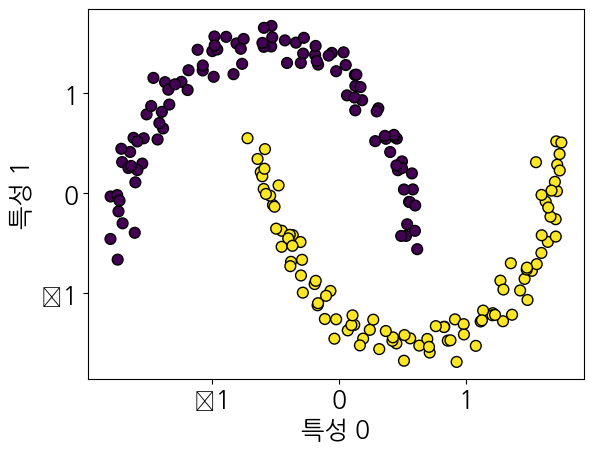

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
X,y=make_moons(n_samples=200, noise=0.05, random_state=0)
scaler=StandardScaler() #정규
scaler.fit(X)
X_scaled=scaler.transform(X)
#K를 자동으로 결정, 중심값을 지정할 필요가 없고 이상치를 자동으로 제거
#연속된 데이터를 하나의 그룹으로 인식할 수 있다
dbscan=DBSCAN(eps=0.5,min_samples=5) #이상치
clusters=dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')